In [1]:
import librosa
audio_file_path='UrbanSound8K/14780-9-0-1.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[-0.13191155  0.02203283  0.18679194 ... -0.08500439 -0.10159009
 -0.15459202]


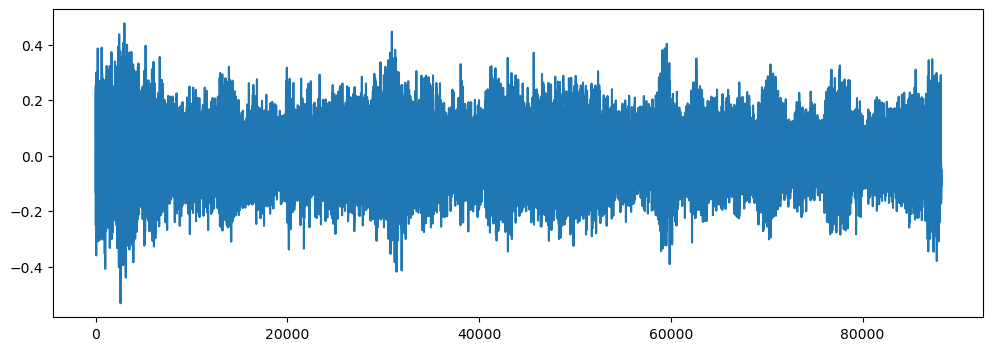

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [4]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [5]:
wave_audio

array([[-8233, -6618],
       [-4901,   159],
       [-1683,  5892],
       ...,
       [-4896, -6774],
       [-4462, -5058],
       [-2934, -2403]], dtype=int16)

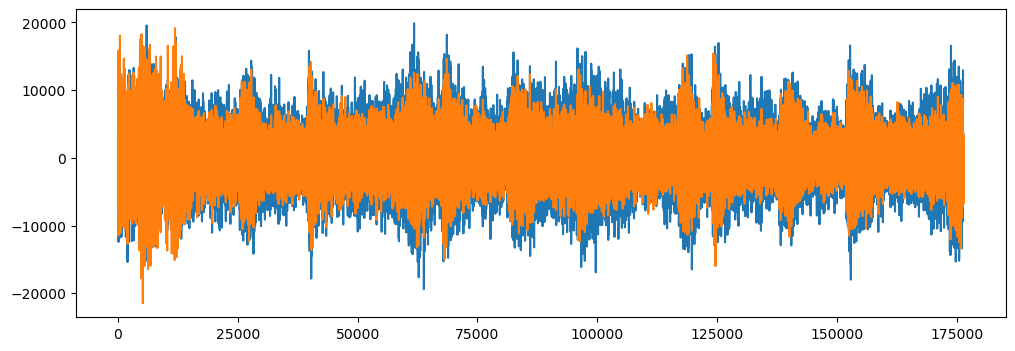

In [6]:
import matplotlib.pyplot as plt

 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [7]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [8]:
mfccs

array([[-63.348286 , -38.062363 , -45.524345 , ..., -49.712685 ,
        -52.585434 , -73.74725  ],
       [ 48.27188  ,  45.798943 ,  53.463036 , ...,  69.98591  ,
         65.26688  ,  67.5276   ],
       [-40.234413 , -43.595154 , -46.73371  , ...,  -0.534533 ,
          2.781694 ,  12.673363 ],
       ...,
       [  3.1693606,  -0.530684 , -10.266804 , ...,   3.2191234,
          1.2973225,   2.6305494],
       [  2.9762716,   2.2223873,  -4.9530425, ...,  -1.126761 ,
         -2.4195423,  -2.0214298],
       [  7.507874 ,  10.029093 ,   8.545519 , ...,   2.3633244,
         -4.0265827,  -5.53856  ]], dtype=float32)

In [9]:
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [11]:
import numpy as np
from tqdm import tqdm

extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [08:19,  5.24it/s]C:\Users\Lakshya\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [18:43, 10.01it/s]C:\Users\Lakshya\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\Lakshya\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [19:32,  7.44it/s]


In [12]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [13]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [14]:
X.shape

(8732, 40)

In [15]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [16]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [17]:
y


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305080e+00, -5.27745247e+00, -1.55697143e+00],
       [-4.98715439e+01,  2.65353173e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939763e+00, ...,
         7.42641389e-01,  7.33490944e-01,  7.11009085e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651151e+00]], dtype=float32)

In [20]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
X_train.shape

(6985, 40)

In [22]:
X_test.shape

(1747, 40)

In [23]:
y_train.shape

(6985, 10)

In [24]:
y_test.shape

(1747, 10)

In [25]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [27]:
num_labels=y.shape[1]

In [28]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [30]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
212/219 [============================>.] - ETA: 0s - loss: 10.2861 - accuracy: 0.1241
Epoch 1: val_loss improved from inf to 2.26338, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 8s 20ms/step - loss: 10.0699 - accuracy: 0.1240 - val_loss: 2.2634 - val_accuracy: 0.1151
Epoch 2/100
211/219 [===========================>..] - ETA: 0s - loss: 2.5079 - accuracy: 0.1445
Epoch 2: val_loss improved from 2.26338 to 2.23853, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 3s 13ms/step - loss: 2.5026 - accuracy: 0.1452 - val_loss: 2.2385 - val_accuracy: 0.1551
Epoch 3/100
212/219 [============================>.] - ETA: 0s - loss: 2.2808 - accuracy: 0.1560
Epoch 3: val_loss improved from 2.23853 to 2.17532, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 3s 12ms/step - loss: 2.2810 - accuracy: 0.1566 - val_loss: 2.1753 - val_accuracy: 0

219/219 [==============================] - 1s 6ms/step - loss: 1.4777 - accuracy: 0.4802 - val_loss: 1.2947 - val_accuracy: 0.5781
Epoch 26/100
215/219 [============================>.] - ETA: 0s - loss: 1.4581 - accuracy: 0.4951
Epoch 26: val_loss improved from 1.29474 to 1.27158, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 7ms/step - loss: 1.4574 - accuracy: 0.4951 - val_loss: 1.2716 - val_accuracy: 0.5890
Epoch 27/100
217/219 [============================>.] - ETA: 0s - loss: 1.4548 - accuracy: 0.4857
Epoch 27: val_loss improved from 1.27158 to 1.26507, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 7ms/step - loss: 1.4531 - accuracy: 0.4863 - val_loss: 1.2651 - val_accuracy: 0.5701
Epoch 28/100
216/219 [============================>.] - ETA: 0s - loss: 1.4081 - accuracy: 0.5150
Epoch 28: val_loss improved from 1.26507 to 1.22158, saving model to saved_models\audio_classific

219/219 [==============================] - 1s 6ms/step - loss: 1.1247 - accuracy: 0.6228 - val_loss: 0.9412 - val_accuracy: 0.6932
Epoch 52/100
215/219 [============================>.] - ETA: 0s - loss: 1.1134 - accuracy: 0.6276
Epoch 52: val_loss improved from 0.94118 to 0.90873, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 7ms/step - loss: 1.1142 - accuracy: 0.6273 - val_loss: 0.9087 - val_accuracy: 0.7172
Epoch 53/100
213/219 [============================>.] - ETA: 0s - loss: 1.1045 - accuracy: 0.6199
Epoch 53: val_loss did not improve from 0.90873
219/219 [==============================] - 1s 5ms/step - loss: 1.1018 - accuracy: 0.6203 - val_loss: 0.9450 - val_accuracy: 0.6995
Epoch 54/100
216/219 [============================>.] - ETA: 0s - loss: 1.1198 - accuracy: 0.6292
Epoch 54: val_loss did not improve from 0.90873
219/219 [==============================] - 1s 5ms/step - loss: 1.1183 - accuracy: 0.6301 - val_loss: 0.9352 -

Epoch 79/100
216/219 [============================>.] - ETA: 0s - loss: 1.0397 - accuracy: 0.6544
Epoch 79: val_loss did not improve from 0.83825
219/219 [==============================] - 1s 7ms/step - loss: 1.0380 - accuracy: 0.6545 - val_loss: 0.8676 - val_accuracy: 0.7390
Epoch 80/100
219/219 [==============================] - ETA: 0s - loss: 1.0289 - accuracy: 0.6611
Epoch 80: val_loss did not improve from 0.83825
219/219 [==============================] - 1s 6ms/step - loss: 1.0289 - accuracy: 0.6611 - val_loss: 0.8402 - val_accuracy: 0.7310
Epoch 81/100
212/219 [============================>.] - ETA: 0s - loss: 1.0124 - accuracy: 0.6633
Epoch 81: val_loss did not improve from 0.83825
219/219 [==============================] - 1s 6ms/step - loss: 1.0117 - accuracy: 0.6639 - val_loss: 0.8416 - val_accuracy: 0.7344
Epoch 82/100
209/219 [===========================>..] - ETA: 0s - loss: 1.0109 - accuracy: 0.6652
Epoch 82: val_loss improved from 0.83825 to 0.81589, saving model to sa

In [32]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.757870614528656


In [37]:
filename="UrbanSound8K/dog_bark.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
predictions = np.argmax(model.predict(mfccs_scaled_features), axis=1)
print(predictions)

1/1 [==============================] - 0s 31ms/step
[5]


In [34]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [ ]:
X_test[1]

In [35]:
np.argmax(model.predict(X), axis=-1)


273/273 [==============================] - 1s 4ms/step


array([3, 2, 2, ..., 9, 1, 1], dtype=int64)

In [36]:
filename="UrbanSound8K/123685-5-0-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label= np.argmax(model.predict(mfccs_scaled_features), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class


[-1.7726138e+02  1.0110262e+02  4.0168674e+01  3.2111149e+01
  7.4728811e-01  1.1828880e+01 -4.4028101e+00  3.7238338e+01
 -9.2584944e+00  2.2195894e+01 -1.3712726e+00  1.6499859e+01
 -5.0596170e+00  2.4777949e+00 -7.0626321e+00  4.3438983e+00
 -1.8693975e+01  7.1139522e+00 -1.3465603e+01  4.0595894e+00
 -1.4443324e+01  8.8503723e+00 -7.5932164e+00  1.3982278e+00
 -4.5115881e+00  4.0990312e-02 -4.8715434e+00 -2.0148110e+00
 -3.8417130e+00  1.4974754e+00 -3.9649146e+00  1.5687921e+00
  8.7420392e-01  1.4309596e+00 -7.2914271e+00 -7.6236123e-01
 -7.3249907e+00  8.2562977e-01 -1.1979347e+00  1.8953464e+00]
[[-1.7726138e+02  1.0110262e+02  4.0168674e+01  3.2111149e+01
   7.4728811e-01  1.1828880e+01 -4.4028101e+00  3.7238338e+01
  -9.2584944e+00  2.2195894e+01 -1.3712726e+00  1.6499859e+01
  -5.0596170e+00  2.4777949e+00 -7.0626321e+00  4.3438983e+00
  -1.8693975e+01  7.1139522e+00 -1.3465603e+01  4.0595894e+00
  -1.4443324e+01  8.8503723e+00 -7.5932164e+00  1.3982278e+00
  -4.5115881e+00 

array(['engine_idling'], dtype='<U16')